In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [3]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results


In [5]:
classifier = svm.SVC(kernel='linear', C=0.01) # **** USE DIFFERENT VALUES OF C  
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [6]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [7]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

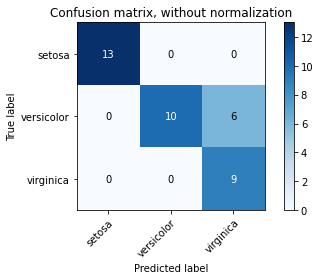

In [8]:

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


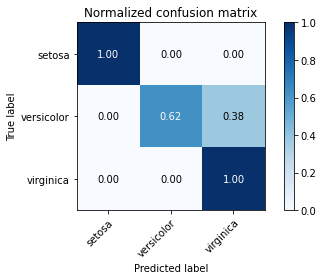

In [9]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [15]:
def plotSVM(svc):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    #plt.title('SVC with linear kernel')
    plt.show()

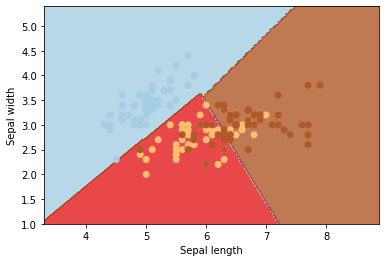

In [16]:
#### 2D Visualization
## Visualization for 2 Dimensional Plane.
X = iris.data[:, :2] 
y = iris.target
svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X, y)
plotSVM(svc)

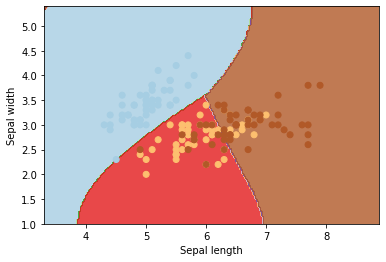

0.8266666666666667

In [17]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)
plotSVM(svc)
svc.score(X,y)

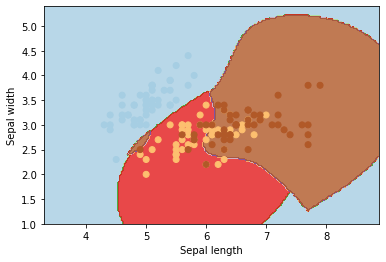

0.8133333333333334

In [18]:
svc = svm.SVC(kernel='rbf', C=1000,gamma='auto').fit(X, y)
plotSVM(svc)
svc.score(X,y)

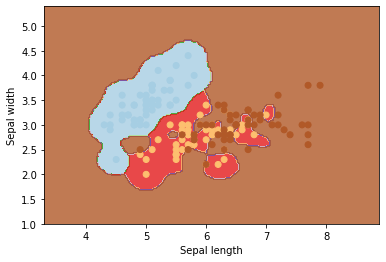

0.9066666666666666

In [19]:
svc = svm.SVC(kernel='rbf', C=10,gamma=20).fit(X, y)
plotSVM(svc)
svc.score(X,y)

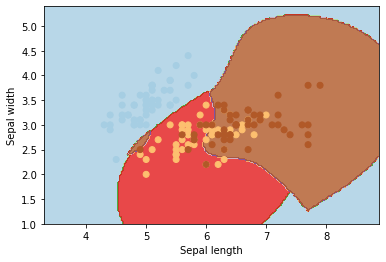

0.8133333333333334

In [20]:
# C as 1000
# Gamma as Auto
svc = svm.SVC(kernel='rbf', C=1000,gamma='auto').fit(X, y)
plotSVM(svc)
svc.score(X,y)

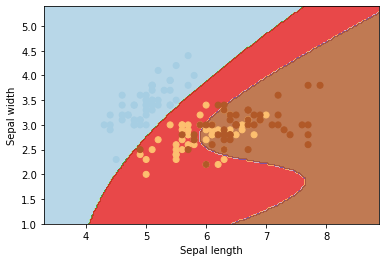

0.8

In [21]:
svc = svm.SVC(kernel='poly', C=1000,gamma='auto').fit(X, y)
plotSVM(svc)
svc.score(X,y)

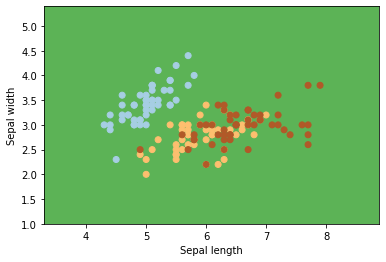

In [22]:
svc = svm.SVC(kernel='sigmoid', C=1000,gamma='auto').fit(X, y)
plotSVM(svc)

In [23]:
svc.score(X,y)

0.3333333333333333